# 0184935 张皓坚的实验报告

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# 获取10个公司年度报告的基本信息以及财务数据

由于在该代码中使用了自身电脑硬盘的文件路径，因此在云端上查看时可能需要注意

In [1]:
import re
import pdfplumber as pr

def get_annualreport_data(filename):

    list_pages = []
    report_pdf = ''
    
    pdf_text = pr.open(filename)
    for page in pdf_text.pages[4:10]:
        list_pages.append(page)
        
    for i in range(len(list_pages)):
        text = list_pages[i].extract_text()
        if bool(text) is True:
            report_pdf += text
            
    r_jc = r"股票简称  (.+)  股票代码"
    r_dm = r"股票代码  (\d{6})"
    r_fr = r"公司的法定代表人  (.+)"
    r_dz = r"办公地址  (.+)"
    r_wz = r"公司国际互联网网址  (.+)"
    r_xx = r"电子信箱  (.+)"
    
    info_basic = {}
    re_t = [r_jc,r_dm,r_fr,r_dz,r_wz,r_xx]
    c_list = ['股票简称','股票代码','公司的法定代表人','办公地址','公司网址','电子信箱']
    
    for i in range(len(re_t)):
        info_basic[c_list[i]] = re.compile(re_t[i]).search(report_pdf).group(1)
    
    ys = {};jlr = {};cf = {};mgsy = {};roe = {};jzc = {}
    
    account_data = {'营业收入':ys,'净利润':jlr,
                    '现金流量净额':cf,'每股收益':mgsy,
                    '加权平均净资产收益率':roe,'净资产':jzc}
    
    do_list = [ys,jlr,cf,mgsy,roe,jzc]
    
    ys_list = ['2017','2018','2019']
    jlr_list = ['2017','2018','2019']
    cf_list = ['2017','2018','2019']
    mgsy_list = ['2017','2018','2019']
    roe_list = ['2017','2018','2019']
    jzc_list = ['2017','2018','2019']
    
    account_list = [ys_list,jlr_list,cf_list,mgsy_list,roe_list,jzc_list]
    
    
    r_ys = r"营业收入(.+)"
    r_jlr = r"归属于上市公司股东的净利润(.+)"
    r_cf = r"经营活动产生的现金流量(.+)"
    r_mgsy = r"基本每股收益(.+)"
    r_roe = r"加权平均净资产收益率(.+)"
    r_jzc = r"归属于上市公司股东的净资产(.+)"
        
    r = [r_ys,r_jlr,r_cf,r_mgsy,r_roe,r_jzc]
    r_num = r'\d+(?:,\d{3})*(?:\.\d+)*'
    
    for account in range(len(account_list)):
        #p = re.compile(r[account])
        #data = p.findall(report_pdf, re.DOTALL)
        data = re.findall(r[account],report_pdf, re.DOTALL)
        
        p1 = re.compile(r_num)
        data = p1.findall(data[0])
        data_new = []
        
        for i in range(len(data)):
            if i == 0 or i==1 or i==3:
                data_new.append(data[i])
        do = do_list[account]
        for i in range(len(account_list[account])):
            do[account_list[account][i]] = data_new[2-i]
    
    #info_c = {'基本信息':info_basic,'财务数据':account_data}
    #info = [info_c,info_basic,account_data]
    info = [info_basic,account_data]
    return info

if __name__=='__main__':
    
   import os
   path1 =r'C:\Users\h5520\Desktop\数据获取\实验报告年报素材\年报'
   def get_filelist(dir):
       Filelist = []
       for home, dirs, files in os.walk(path1):
           for filename in files:
            # 文件名列表，包含完整路径
                Filelist.append(os.path.join(home, filename))
            # # 文件名列表，只包含文件名
            # Filelist.append( filename)
       return Filelist
   file_list = get_filelist(dir)
   
   company_info = []
   for i in range(len(file_list)):
       company_info.append(get_annualreport_data(file_list[i]))



In [6]:
import pandas as pd
basic_info = []
for i in range(len(company_info)):
    basic_info.append(company_info[i][0])
df1 = pd.DataFrame(basic_info)
df1

公司的法定代表人                                              公司网址  \
0     陈吉红                               www.huazhongcnc.com    
1     许文显   www.yuanlicarbon.com  电子信箱  dm@yuanlicarbon.com    
2     彭国锋                           http://www.rikechem.com    
3      方刚                               http://www.hlbn.cc/    
4     曹建伟                               http://www.jsjd.cc/    
5     许永良                                     www.etrol.com    
6     臧立国                            http://www.stnm.com.cn    
7      陈栗                       http://www.cendes-arch.com/    
8     刘景裕                          http://www.superchip.cn/    
9     史志明                           http://www.casit.com.cn    

                                  办公地址                         电子信箱    股票代码  \
0                       武汉市东湖开发区华工科技园               hcnc@hzncc.com   300161   
1  福建省南平市陈坑至瓦口工业园区  办公地址的邮政编码  353013          dm@yuanlicarbon.com   300174   
2                      山东省昌乐县英轩街3999号        rikechem@rikechem.com   300214   
3                   北京市朝阳区安家楼50号院A7-2               hbndsh@hlbn.cc   300291   
4                浙江省杭州市余杭区五常街道创智一号2号楼                 jsjd@jsjd.cc   300316   
5                     北京市海淀区地锦路9号院6号楼               info@etrol.com   300370   
6                      保定市清苑区发展西街359号             info@stnm.com.cn   300428   
7              成都市锦江区东大街芷泉段6号1栋1单元37层   cendes.bso@cendes-arch.com   300492   
8           深圳市福田区香蜜湖街道农园路时代科技大厦西区18楼             zqb@superchip.cn   300671   
9                      四川省成都市人民南路四段9号             dsh@casit.com.cn   300678   

   股票简称  
0  华中数控  
1  元力股份  
2  日科化学  
3  华录百纳  
4  晶盛机电  
5  安控科技  
6  四通新材  
7  山鼎设计  
8  富满电子  
9  中科信息

In [24]:
cf_list = []
for i in range(len(company_info)):
    cf_list.append(company_info[i][1]['现金流量净额'])
df2 = pd.DataFrame(cf_list)
df2

2017            2018            2019
0  156,320,029.48  133,781,403.75    7,706,529.47
1   94,527,023.17  118,442,722.58   14,730,680.18
2   49,906,177.00   55,615,076.59  136,236,696.09
3   70,961,621.73  137,869,021.38  110,408,056.93
4  152,914,455.76  165,622,308.33  778,798,470.40
5  430,024,950.20  225,953,245.64  232,986,504.08
6  272,422,955.37  633,577,583.86  605,197,255.04
7   14,869,805.58   87,018,747.28   31,042,146.51
8   18,477,538.53    2,950,356.13   36,600,504.30
9   12,052,326.74   12,732,925.39    4,971,602.19

<BarContainer object of 10 artists>

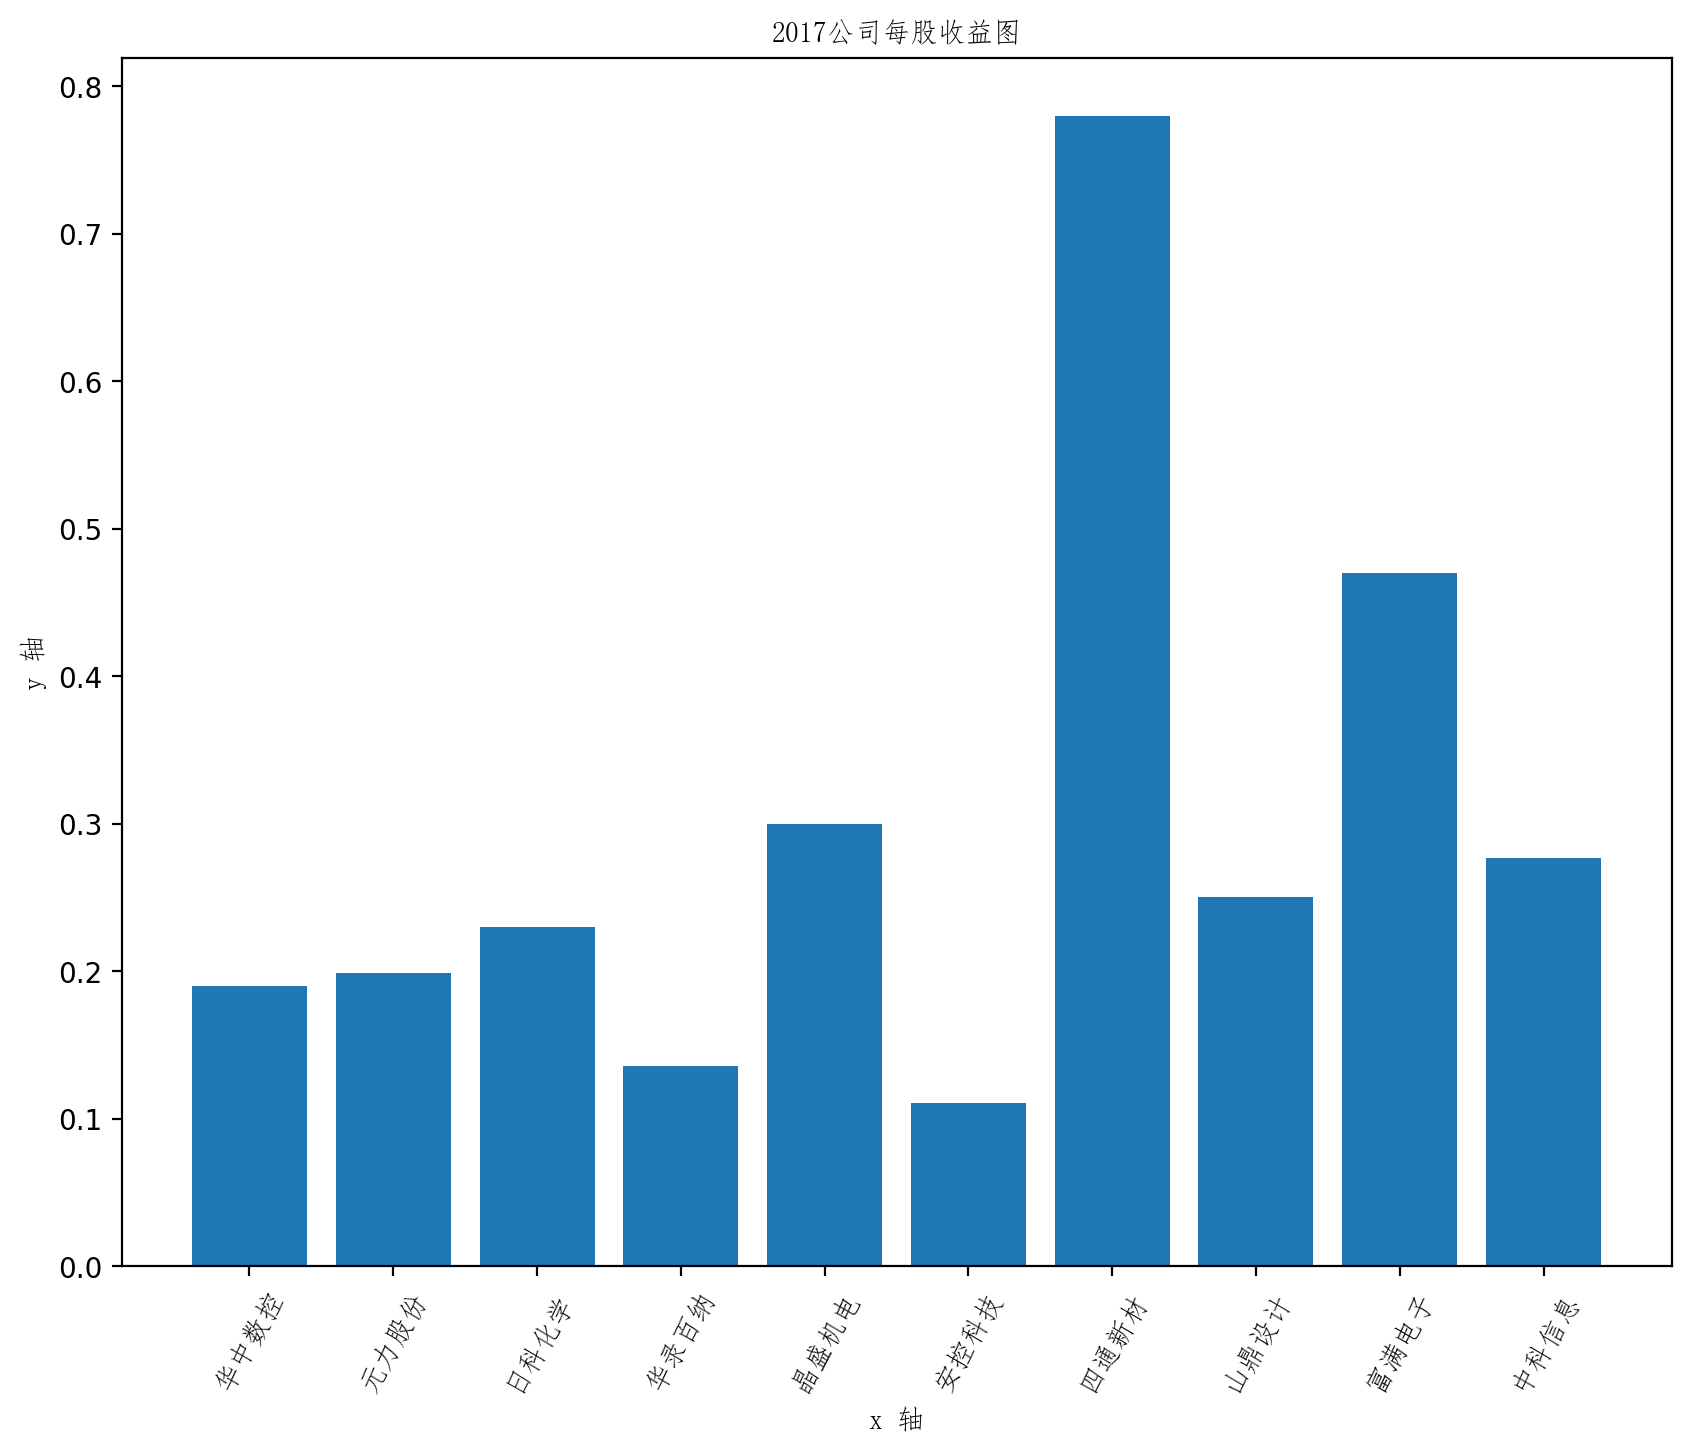

In [69]:
from matplotlib import pyplot as plt
import matplotlib
mgsy_list = []
for i in range(len(company_info)):
    mgsy_list.append(company_info[i][1]['每股收益'])
df3 = pd.DataFrame(mgsy_list,dtype=float)

plt.figure(figsize=(10,8),dpi=200)
zhfont1 = matplotlib.font_manager.FontProperties(fname="C:\WINDOWS\FONTS\SIMFANG.TTF") 
plt.title("2017公司每股收益图", fontproperties=zhfont1) 
plt.xlabel("x 轴", fontproperties=zhfont1)
plt.ylabel("y 轴", fontproperties=zhfont1)


x_ = df3.iloc[:,0]
x_t = []
for i in range(len(company_info)):
    x_t.append(company_info[i][0]['股票简称'])
plt.xticks(range(len(x_t)),x_t,fontproperties=zhfont1,rotation = 60)
plt.bar(x_t,x_)


# 由上图可以看到在2017年四通新材的每股收益最大

<BarContainer object of 10 artists>

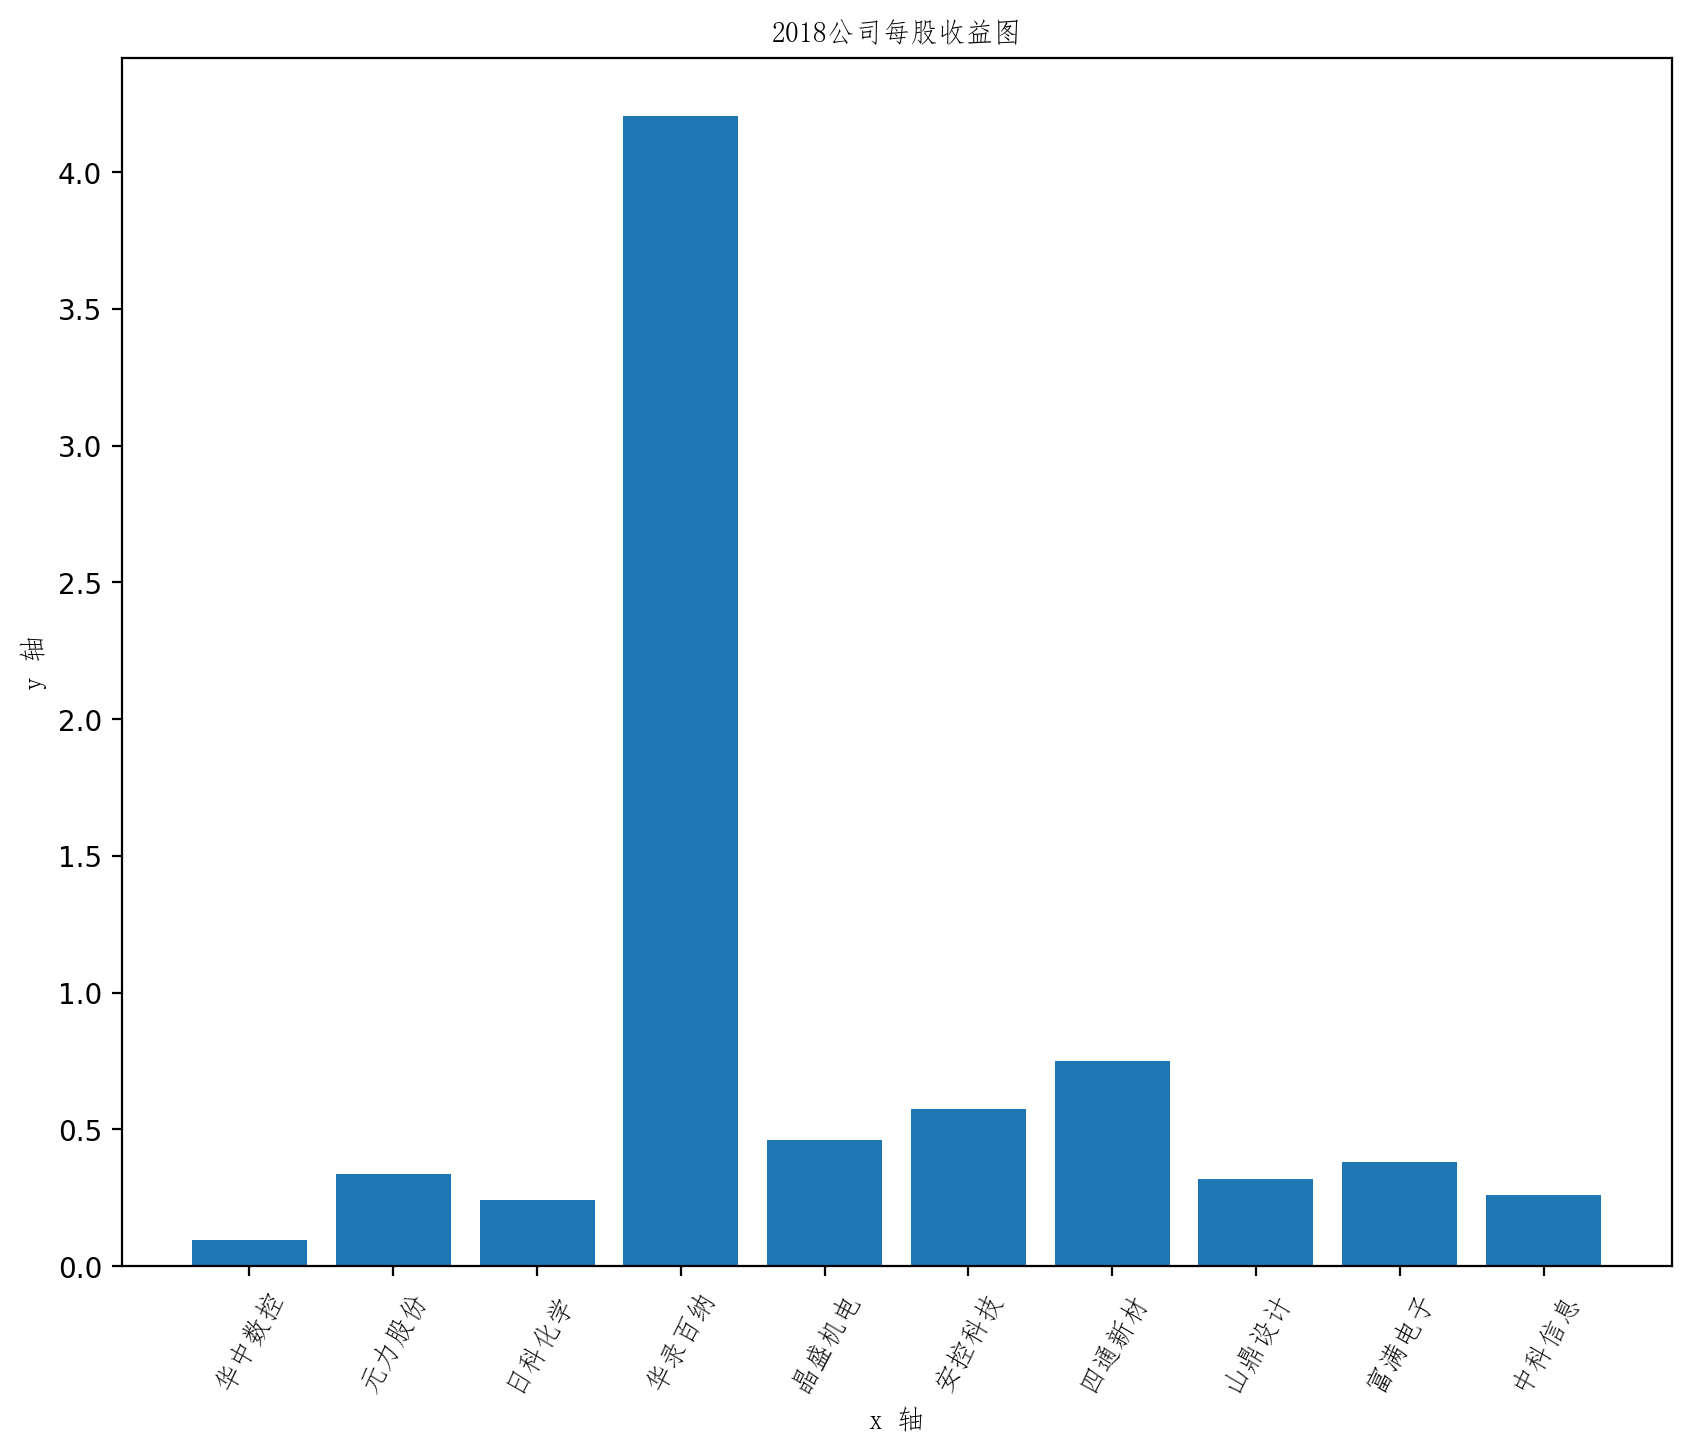

In [68]:
zhfont1 = matplotlib.font_manager.FontProperties(fname="C:\WINDOWS\FONTS\SIMFANG.TTF") 
plt.figure(figsize=(10,8),dpi=200)
plt.title("2018公司每股收益图", fontproperties=zhfont1) 
plt.xlabel("x 轴", fontproperties=zhfont1)
plt.ylabel("y 轴", fontproperties=zhfont1)

x_ = df3.iloc[:,1]
x_t = []
for i in range(len(company_info)):
    x_t.append(company_info[i][0]['股票简称'])
plt.xticks(range(len(x_t)),x_t,fontproperties=zhfont1,rotation = 60)
plt.bar(x_t,x_)

# 由上图可以看到在2018年华录百纳的每股收益最大

<BarContainer object of 10 artists>

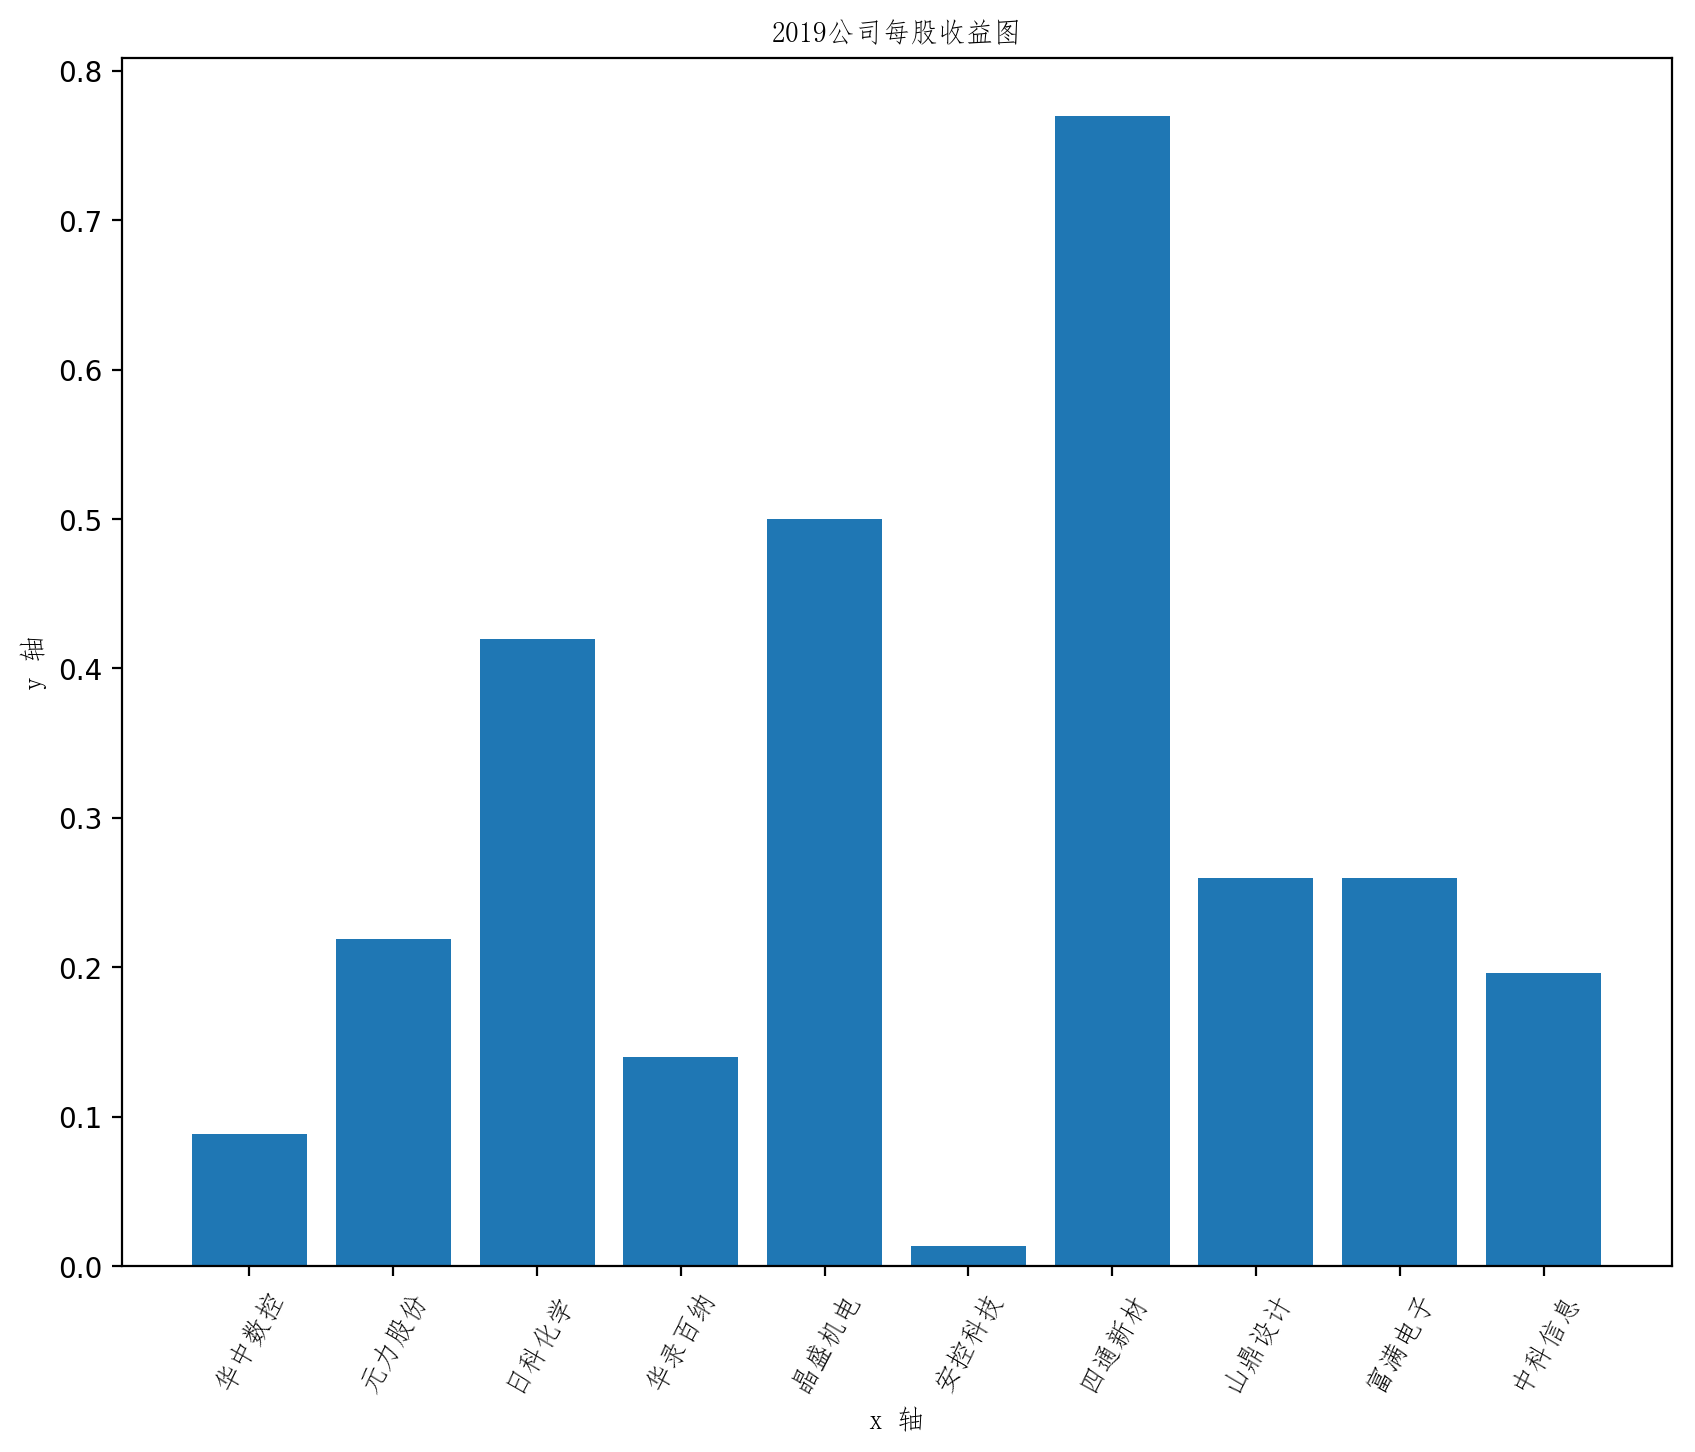

In [72]:
plt.figure(figsize=(10,8),dpi=200)
plt.title("2019公司每股收益图", fontproperties=zhfont1) 
plt.xlabel("x 轴", fontproperties=zhfont1)
plt.ylabel("y 轴", fontproperties=zhfont1)
x_ = df3.iloc[:,2]
x_t = []
for i in range(len(company_info)):
    x_t.append(company_info[i][0]['股票简称'])
plt.xticks(range(len(x_t)),x_t,fontproperties=zhfont1,rotation = 60)
plt.bar(x_t,x_)

# 由上图可以看到在2019年四通新材的每股收益最大

# 由以上三张图可以看出，华录百纳的每股收益波动很大，而四通新材的每股收益较为稳定，由此推断四通新材公司经营较号，具有一定的投资价值